In [1]:
import property_inference_interface
interface = property_inference_interface.PropertyInferenceInterface()

meta_params = {
    'first_class': 5, 
    'second_class': 7, 
    'size_of_train_set': 3000, 
    'size_of_test_set': 100,
    'subsample_ratio': 1, 
    'flatten': True, 
    
    'is_ran_per_included': False, 
    'ran_dist': 'uniform', 
    'uni_range': 0.2, 
    'normal_std': 0.1,
    
    'model_type': 'normal',
    'adv_attack': 'i_FGSM'
}

interface.set_meta_params(meta_params)
interface.print_meta_params()

Using TensorFlow backend.


first_class          : 5
second_class         : 7
size_of_train_set    : 3000
size_of_test_set     : 100
subsample_ratio      : 1
flatten              : True
is_ran_per_included  : False
ran_dist             : uniform
uni_range            : 0.2
normal_std           : 0.1
model_type           : normal
adv_attack           : i_FGSM


In [2]:
interface.prepare_dataset()
interface.print_dataset_shape()

Train dataset
(3000, 784) (3000,)
Test dataset
(100, 784) (100,)


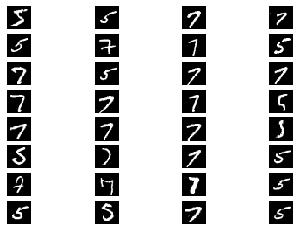

In [3]:
# Visualize the dataset
%matplotlib inline
interface.print_some_samples()

In [4]:
interface.generate_model()
interface.eval_model()

Model (train) accurancy: 1.0


1.0

In [5]:
print('Display the architectur')
interface.model

Display the architectur


NormalC(
  (layer1): Linear(in_features=784, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=20, bias=True)
  (layer4): Linear(in_features=20, out_features=10, bias=True)
  (layer5): Linear(in_features=10, out_features=2, bias=True)
  (relu): ReLU()
)

In [6]:
interface.generate_set_of_preconditions()
interface.print_set_of_preconditions()
num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F = interface.info_about_set_of_preconditions()

Length of each precondition (provenance): 64
Total Input Properties extracted for the first class: 1364
Total Input Properties extracted for the second class: 1636
Total Input Properties extracted for the first class (unique): 763
Total Input Properties extracted for the second class (unique): 638


In [7]:
alphas = [1e-2, 1e-3, 1e-4, 1e-5, 5e-6, 1e-6, 5e-7, 1e-7, 7e-8, 5e-8, 2e-8, 1e-8, 5e-9, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16]
for alpha in alphas:
    benign_detect_ratio, adversarial_detect_ratio = interface.evaluate_algorithm_on_test_set(alpha, verbose=False)
    exp_info = [num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F, benign_detect_ratio, adversarial_detect_ratio]
    print(alpha, exp_info)

0.01 [1364, 1636, 763, 638, 0.37, 1.0]
0.001 [1364, 1636, 763, 638, 0.79, 1.0]
0.0001 [1364, 1636, 763, 638, 0.91, 1.0]
1e-05 [1364, 1636, 763, 638, 0.93, 1.0]
5e-06 [1364, 1636, 763, 638, 0.93, 1.0]
1e-06 [1364, 1636, 763, 638, 0.95, 0.99]
5e-07 [1364, 1636, 763, 638, 0.95, 0.98]
1e-07 [1364, 1636, 763, 638, 0.96, 0.94]
7e-08 [1364, 1636, 763, 638, 0.96, 0.92]
5e-08 [1364, 1636, 763, 638, 0.96, 0.9]
2e-08 [1364, 1636, 763, 638, 0.97, 0.88]
1e-08 [1364, 1636, 763, 638, 0.97, 0.88]
5e-09 [1364, 1636, 763, 638, 0.98, 0.85]
1e-09 [1364, 1636, 763, 638, 0.99, 0.73]
1e-10 [1364, 1636, 763, 638, 1.0, 0.57]
1e-11 [1364, 1636, 763, 638, 1.0, 0.41]
1e-12 [1364, 1636, 763, 638, 1.0, 0.3]
1e-13 [1364, 1636, 763, 638, 1.0, 0.25]
1e-14 [1364, 1636, 763, 638, 1.0, 0.2]
1e-15 [1364, 1636, 763, 638, 1.0, 0.14]
1e-16 [1364, 1636, 763, 638, 1.0, 0.09]


In [8]:
exp_info = [num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F, benign_detect_ratio, adversarial_detect_ratio]
print(exp_info)

[1364, 1636, 763, 638, 1.0, 0.09]


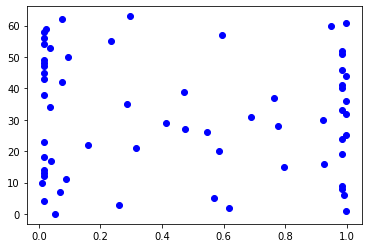

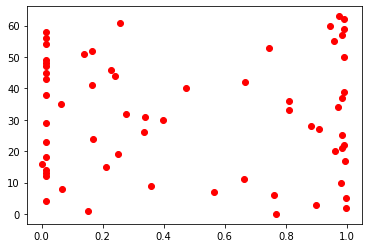

In [9]:
import numpy as np
prob_LPs = interface.prob_property_set
prob_LP1, prob_LP2 = prob_LPs[0], prob_LPs[1]

''' Design 1
risk_score = 0
if idx, neuron_state in enumerate(provenance): 
    risk_score = |neuron_state - prob[idx]|
'''

''' Design 2
risk_score = 0
if idx, neuron_state in enumerate(provenance): 
    diff = |neuron_state - prob[idx]|
    if diff > threshold:
        risk_score = diff 
'''

%matplotlib inline 
import matplotlib.pyplot as plt
y = np.arange(64)
plt.plot(prob_LP1, y, 'bo')
plt.show()

plt.plot(prob_LP2, y, 'ro')
plt.show()

In [10]:
def single_exp():
    interface.generate_model()
    acc = interface.eval_model()
    if not (acc == 1.0):
        interface.generate_model()
        acc = interface.eval_model()
        
    interface.generate_set_of_preconditions()
    num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F = interface.info_about_set_of_preconditions()
    benign_detect_ratio, adversarial_detect_ratio = interface.evaluate_algorithm_on_test_set(verbose=True)
    exp_info = [num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F, benign_detect_ratio, adversarial_detect_ratio]
    return exp_info    

def exp(num_of_trails, file_name):
    cumulative_exp_info = []
    
    import csv 

    for i in range(num_of_trails):
        print('trail', (i+1))
        single_exp_info = single_exp()
        cumulative_exp_info.append(single_exp_info)

        with open(file_name, mode='a', newline='') as file:
            writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            writer.writerow(single_exp_info)
        file.close()

        print(single_exp_info)
        
    return cumulative_exp_info

file_name = 'test.csv'
# cumulative_exp_info = exp(40, file_name)